神经网络——手写数字识别

In [19]:
import numpy
# scipy.special为sigmoid功能实现
import scipy.special
import matplotlib.pyplot


# 定义神经网络类
class neuralNetwork:
    # 初始化类
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 设置每次输入的输入层节点、隐藏层节点、输出层节点数量
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # 连接权重矩阵，分别为输入——隐藏：wih 和隐藏——输出：who
        # 权重插入矩阵为w_i_j，连接的是下一层的节点i到节点j
        # w11 w21
        # w12 w22 etc
        self.wih = (numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)))
        self.who = (numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)))

        # 学习率
        self.lr = learningrate

        # 定义activation方法用来创建匿名函数实现sigmoid功能
        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    # 训练神经网络
    def train(self, inputs_list, targets_list):
        # 将输入填入二维数组
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # 计算传入隐藏层的信号
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 计算隐藏层的输出信号
        hidden_outputs = self.activation_function(hidden_inputs)

        # 计算传入输出层的信号
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 计算输出层的输出信号
        final_outputs = self.activation_function(final_inputs)

        # 计算误差(目标值 - 实际值)
        output_errors = targets - final_outputs

        # 计算隐藏层节点反向传播误差（who矩阵点乘输出误差矩阵）
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # 更新连接隐藏层和输出层的权重矩阵
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # 更新连接输入层和隐藏层的权重矩阵
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass

    # 查询神经网络
    def query(self, inputs_list):
        # 将输入填入二维数组
        inputs = numpy.array(inputs_list, ndmin=2).T

        # 计算传入隐藏层的信号
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 计算隐藏层的输出信号
        hidden_outputs = self.activation_function(hidden_inputs)

        # 计算传入输出层的信号
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 计算输出层的输出信号
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


训练模型

In [24]:
# 训练模型
# 输入层、隐藏层、输出层节点数
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 学习率
learing_rate = 0.3

# 创建神经网络实例
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learing_rate)

# 载入训练集
training_data_file = open("mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 训练神经网络
# 遍历训练数据集
for record in training_data_list:
    # 按逗号分隔数据信息
    all_values = record.split(',')
    # 载入输入信息
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    # 创建目标输出数据
    targets = numpy.zeros(output_nodes) + 0.01
    # all_values[0]是目标标签
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass


测试模型

In [21]:
# 载入测试数据集
test_data_file = open("mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

all_values = test_data_list[3].split(',')
inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
out = n.query(inputs)
outnum = numpy.argmax(out)
print(outnum)

0


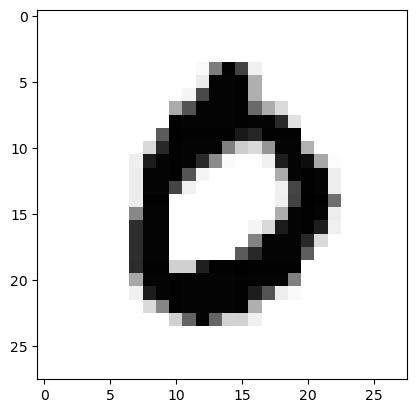

In [22]:
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys',interpolation='None')

测试训练模型的准确性

In [25]:
# 测试神经网络的准确性
# 载入测试数据
test_data_file = open("mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

scorecord = []

# 测试结果与标签进行匹配
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if label == correct_label:
        scorecord.append(1)
    else:
        scorecord.append(0)
        pass
    pass

# 计算准确率
scorecord_array = numpy.asarray(scorecord)
print("performance = ",scorecord_array.sum()/scorecord_array.size)

performance =  0.9467


手写体测试

In [39]:
import imageio
img_array = imageio.imread("number.png", as_gray=True)
img_data  = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01
out = n.query(img_data)
outnum = numpy.argmax(out)
print("手写数字识别为：",outnum)

手写数字识别为： 6


C:\Users\BeiFeng\AppData\Local\Temp\ipykernel_15496\4326949.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array = imageio.imread("number.png", as_gray=True)
